# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.head())

#Data cleaning

penguins_df.isnull().sum()
penguins_df.shape
penguins_df.dropna()



   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


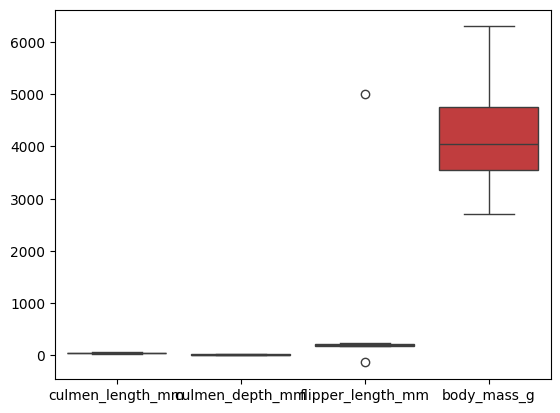

In [2]:
sns.boxplot(data=penguins_df)
plt.show()

In [3]:


seventy_fifth = penguins_df["flipper_length_mm"].quantile(0.75)
twenty_fifth = penguins_df["flipper_length_mm"].quantile(0.25)
iqr_range = seventy_fifth - twenty_fifth
upper_threshold = 4000
lower_threshold = 0
penguins_clean = penguins_df[(penguins_df["flipper_length_mm"] < upper_threshold) & (penguins_df["flipper_length_mm"] > lower_threshold)]
print(penguins_clean.head())
print(penguins_clean.flipper_length_mm.min())
print(penguins_clean.flipper_length_mm.max())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE
172.0
231.0


In [4]:
penguins_dummy = pd.get_dummies(data=penguins_clean['sex'], prefix='sex', drop_first=True)
print(penguins_dummy)

     sex_FEMALE  sex_MALE
0             0         1
1             1         0
2             1         0
4             1         0
5             0         1
..          ...       ...
338           1         0
340           1         0
341           0         1
342           1         0
343           0         1

[340 rows x 2 columns]


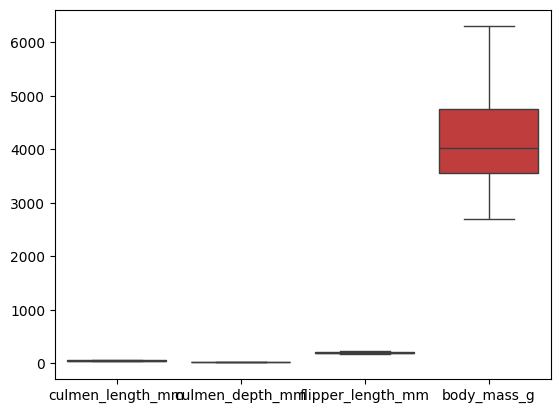

In [5]:
sns.boxplot(data=penguins_clean)
plt.show()

In [6]:
penguins_fin = pd.concat([penguins_clean,penguins_dummy], axis=1)
penguins_fin.drop(columns='sex',inplace=True)
print(penguins_fin.head())

   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0              39.1             18.7  ...           0         1
1              39.5             17.4  ...           1         0
2              40.3             18.0  ...           1         0
4              36.7             19.3  ...           1         0
5              39.3             20.6  ...           0         1

[5 rows x 6 columns]


In [7]:
scaler = StandardScaler()
scaled_penguins = scaler.fit_transform(penguins_fin)
print(scaled_penguins)

[[-0.89195731  0.80113199 -1.41843103 -0.56164097 -0.97100831  1.01780555]
 [-0.81846958  0.13752566 -1.06303932 -0.49937885  1.0298573  -0.98250594]
 [-0.67149412  0.4438055  -0.42333424 -1.1842622   1.0298573  -0.98250594]
 ...
 [ 1.18407103 -0.73026724  1.49578099  1.92884395 -0.97100831  1.01780555]
 [ 0.22873056 -1.18968701  0.78499757  1.24396059  1.0298573  -0.98250594]
 [ 1.09221137 -0.52608068  0.85607591  1.49300908 -0.97100831  1.01780555]]


In [8]:
pca = PCA()
pca.fit(scaled_penguins)
n_component = sum(x>0.1 for x in pca.explained_variance_ratio_)
pca = PCA(n_components=n_component)
pca.fit(scaled_penguins)
penguins_PCA = pca.transform(scaled_penguins)

In [9]:

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit model to penguins_PCA
    model.fit(penguins_PCA)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
print(inertias)

[1749.4550697150507, 929.5726107744056, 444.7957434800698, 139.82744082840418, 105.30230374449647, 75.79054687568762, 66.30868283254308, 57.05689864642578, 51.70462795484765]


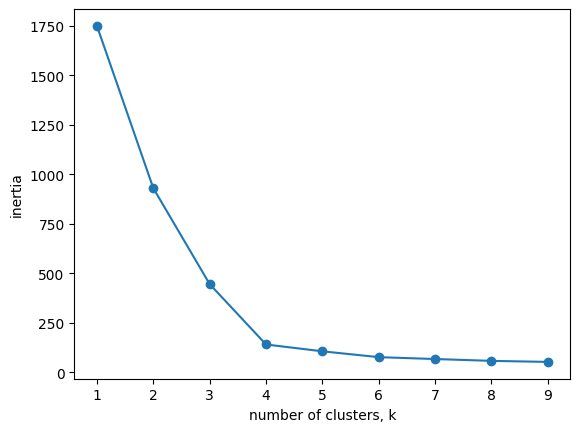

In [10]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


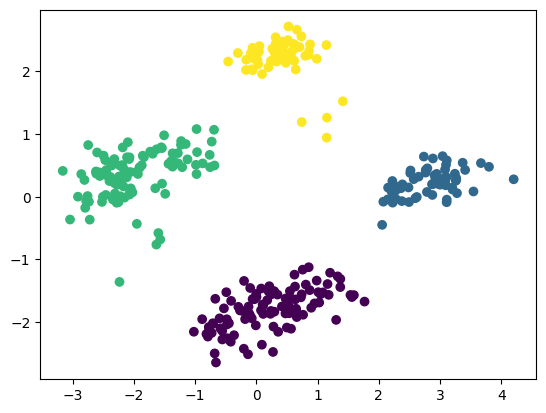

In [11]:
n_cluster=4
kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(penguins_PCA)
plt.scatter(c=kmeans.labels_, x=penguins_PCA[:, 0], y=penguins_PCA[:, 1])
plt.show()

In [12]:
penguins_clean['label'] = kmeans.labels_
col_list = penguins_clean.columns.values
numeric_columns = col_list[0:3]
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             49.473770        15.718033         221.540984
2             40.094595        17.619820         188.882883
3             45.567742        14.258065         212.903226
